In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("x_train: ", x_train.shape)

x_train:  (50000, 32, 32, 3)


In [4]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

In [5]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

In [6]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train.shape

(50000, 3072)

In [8]:
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr


w1: (3072, 10)
b1: (10,)


In [9]:
print(y_train.shape)

(50000, 10)


In [15]:
m=Ntr
iterations =300
lr =0.02
lr_decay=0.99
global reg
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

In [16]:
def MSE(y_true,y_pred,w,m):
    return((1/m)*np.sum(np.square(y_pred-y_true))+reg*(np.sum(w*w)))

In [17]:
def forward(x,w,b):
    return(np.matmul(x,w)+b)

In [18]:
def GD(w,b,lr,x,y_true,y_pred,m):
    transpose=np.transpose(x)
    dy=(1/m)*2*(y_pred-y_true)# partial derivative of L w.r.t y_pred
    w=w-lr*(np.matmul(transpose,dy)+reg*w)# partial derivative of L w.r.t w1 and updating w1
    b=b-lr*(np.sum(dy,axis=0)) # partial derivative of L w.r.t b1 and updating b1
    return(w,b)

In [19]:
def zigmoid(y):
    return(1.0/(1.0 + np.exp(-y)))

In [20]:
for t in range(300):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    train_x_shuffled=x_train[indices]
    train_y_shuffled=y_train[indices]
    pred=forward(train_x_shuffled,w1,b1)#forward pass
    loss=MSE(train_y_shuffled,pred,w1,Ntr)#loss calculation 
    loss_history.append(loss)
    a=np.sum((np.argmax(pred,axis=1)==np.argmax(train_y_shuffled,axis=1)))#total number of correct predictions 
    acc=(a/Ntr)*100
    pred_test=forward(x_test,w1,b1)
    loss_test=MSE(y_test,pred_test,w1,Nte)
    a1=np.sum((np.argmax(pred_test,axis=1)==np.argmax(y_test,axis=1)))
    acc1=(a1/Nte)*100
    w1,b1=GD(w1,b1,lr,train_x_shuffled,train_y_shuffled,pred,Ntr)#GD and back propagation 
    if (t%10==0):
        print( "Itr",t,"| Lr =",lr,"| Loss train=",loss,"| Acc train =",acc,"% | Loss test=",loss_test,"| Acc test =",acc1,"%")
    elif (t==299):
        print( "Last itr Lr =",lr,"| Loss train=",loss,"| Acc train =",acc,"% | Loss test=",loss_test,"| Acc test =",acc1,"%")
    train_acc_history.append(acc)
    val_acc_history.append(acc1)
    lr=lr*lr_decay

Itr 0 | Lr = 0.02 | Loss train= 1.0000174347430655 | Acc train = 9.558 % | Loss test= 1.000016286109591 | Acc test = 9.87 %
Itr 10 | Lr = 0.01808764150017609 | Loss train= 0.9703939837091005 | Acc train = 22.066 % | Loss test= 0.9742314987398901 | Acc test = 22.06 %
Itr 20 | Lr = 0.016358138751944615 | Loss train= 0.8470343703920523 | Acc train = 33.71 % | Loss test= 0.8487314914696481 | Acc test = 33.47 %
Itr 30 | Lr = 0.014794007467765607 | Loss train= 0.8142435394053258 | Acc train = 38.716 % | Loss test= 0.8145864029349718 | Acc test = 38.66 %
Itr 40 | Lr = 0.01337943517139361 | Loss train= 0.8062562136286844 | Acc train = 39.21 % | Loss test= 0.8067633510678198 | Acc test = 39.0 %
Itr 50 | Lr = 0.012100121342750729 | Loss train= 0.8016066822265977 | Acc train = 39.56 % | Loss test= 0.8023345085108197 | Acc test = 39.17 %
Itr 60 | Lr = 0.010943132847815222 | Loss train= 0.798654646649485 | Acc train = 39.78 % | Loss test= 0.7995848440244617 | Acc test = 39.25 %
Itr 70 | Lr = 0.0098

Text(0.5, 1.0, 'Training Loss')

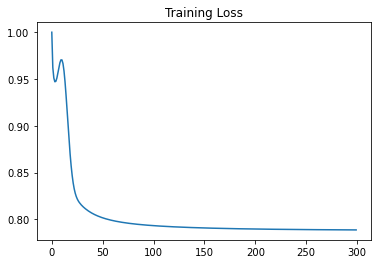

In [25]:
plt.plot(loss_history)
plt.title("Training Loss")

Text(0.5, 1.0, 'Training Accuracy')

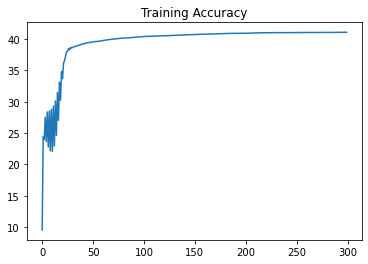

In [22]:
plt.plot(train_acc_history)
plt.title("Training Accuracy")

Text(0.5, 1.0, 'Test Accuracy')

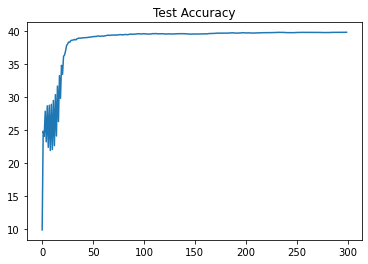

In [23]:
plt.plot(val_acc_history)
plt.title("Test Accuracy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

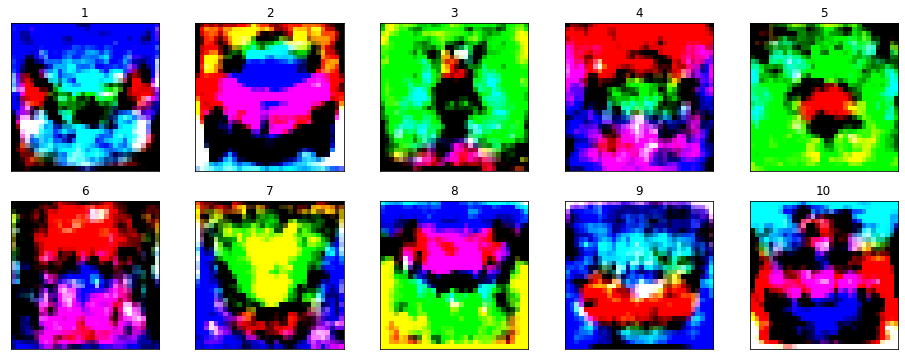

In [24]:
fig,ax = plt.subplots(2,5)
fig.set_size_inches(16,6)
for j in range (2):
  for i in range(5):
    img = w1[:,5*j+i].reshape(32,32,3)
    ax[j,i].imshow(img*1000)
    ax[j,i].set_xticks([])
    ax[j,i].set_yticks([])
    d=5*j+i+1
    ax[j,i].set_title(d)
plt.show()
